<a href="https://colab.research.google.com/github/7beunseo/Today-Study/blob/main/colab/yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# ls

%cd drive
%cd MyDrive
%cd OhMea/yolo

!git clone https://github.com/ultralytics/yolov5

%ls

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/OhMea/yolo
[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive/OhMea/yolo
[Errno 2] No such file or directory: 'OhMea/yolo'
/content/drive/MyDrive/OhMea/yolo
Cloning into 'yolov5'...
remote: Enumerating objects: 16675, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 16675 (delta 98), reused 127 (delta 59), pack-reused 16459
Receiving objects: 100% (16675/16675), 15.37 MiB | 13.72 MiB/s, done.
Resolving deltas: 100% (11397/11397), done.
data.yaml  README.dataset.txt  README.roboflow.txt  test/  train/  valid/  yolov5/


In [ ]:
!git clone https://github.com/ultralytics/yolov5 # YOLOv5 레퍼지토리 clone

Cloning into 'yolov5'...
remote: Enumerating objects: 16675, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 16675 (delta 98), reused 127 (delta 59), pack-reused 16459
Receiving objects: 100% (16675/16675), 15.37 MiB | 13.20 MiB/s, done.
Resolving deltas: 100% (11397/11397), done.


In [ ]:
data_dir = '/content/drive/MyDrive/OhMea/yolo'
data_yaml = '/content/drive/MyDrive/OhMea/yolo/data.yaml'

In [ ]:
# 필요한 패키지 다운로드 및 임포트
%cd drive
%cd MyDrive
%cd OhMea/yolo/yolov5
%ls
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import yaml
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

# yaml 파일의 train, val 데이터가 있는 경로 수정 (기존 경로 -> 구글 드라이브에 저장된 경로로)
data_dir = '/content/drive/MyDrive/OhMea/yolo'
data_yaml = '/content/drive/MyDrive/OhMea/yolo/data.yaml'

# YAML 파일 불러오기
with open(data_yaml, 'r') as f:
    film = yaml.load(f, Loader=yaml.FullLoader)

film['train'] = '/content/drive/MyDrive/OhMea/yolo/train/images'
film['val'] = '/content/drive/MyDrive/OhMea/yolo/valid/images'

with open(data_yaml, 'w') as f:
    yaml.dump(film, f)

print('변경된 yaml 파일 :')
with open(data_yaml) as f:
    film = yaml.load(f, Loader=yaml.FullLoader)
    display(film)

# 이미지 학습
!python train.py --img 416 --batch 16 --epochs 00 --data {data_yaml} --weights yolov5s.pt --cache

# 테스트 이미지 경로
test_data_dir = film['val']

# train_exp_num 지정
train_exp_num = 5

!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.1 --source {test_data_dir}

# 테스트 결과 확인


import glob
from IPython.display import Image, display

test_exp_num = ''

if not os.path.exists('/content/drive/MyDrive/OhMea/yolo/yolov5/runs/detect/exp' + str(test_exp_num) + '/') :
  raise Exception('test_exp_num 을 다시 확인하세요.')

for imageName in glob.glob('/content/drive/MyDrive/OhMea/yolo/yolov5/runs/detect/exp' + str(test_exp_num) + '/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/OhMea/yolo/yolov5
[Errno 2] No such file or directory: 'MyDrive'
/content/drive/MyDrive/OhMea/yolo/yolov5
[Errno 2] No such file or directory: 'OhMea/yolo/yolov5'
/content/drive/MyDrive/OhMea/yolo/yolov5
benchmarks.py    data/       LICENSE         README.md         train.py
CITATION.cff     detect.py   models/         README.zh-CN.md   tutorial.ipynb
classify/        export.py   __pycache__/    requirements.txt  utils/
CONTRIBUTING.md  hubconf.py  pyproject.toml  segment/          val.py
[Errno 2] No such file or directory: 'yolov5'
/content/drive/MyDrive/OhMea/yolo/yolov5
Setup complete. Using torch 2.3.0+cu121 (Tesla T4)
변경된 yaml 파일 :


{'names': ['Kochujang',
  'apple',
  'avocado',
  'bacon',
  'banana',
  'beef',
  'bread',
  'burdock',
  'butter',
  'cabbage',
  'canned_corn',
  'canned_tuna',
  'carrot',
  'cheese',
  'chicken',
  'chili_powder',
  'chocolate_bread',
  'cinnamon',
  'cooking_oil',
  'corn',
  'cornflake',
  'crab_meat',
  'cucumber',
  'curry_powder',
  'dumpling',
  'egg',
  'fish_cake',
  'french_fries',
  'garlic',
  'ginger',
  'green_onion',
  'ham',
  'hash_brown',
  'hotdog',
  'ice',
  'ketchup',
  'kimchi',
  'lemon',
  'lemon_juice',
  'mandarin',
  'marshmallow',
  'mayonnaise',
  'milk',
  'mozzarella cheese',
  'mushroom',
  'mustard',
  'nacho_chips',
  'noodle',
  'nutella',
  'olive_oil',
  'onion',
  'oreo',
  'parmasan_cheese',
  'parsley',
  'pasta',
  'peanut_butter',
  'pear',
  'pepper',
  'pepper_powder',
  'pickle',
  'pickled_radish',
  'pimento',
  'pineapple',
  'pork',
  'potato',
  'ramen',
  'red_wine',
  'rice',
  'salt',
  'sausage',
  'seaweed',
  'seseme',
  'ses

2024-06-23 11:35:31.520905: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 11:35:31.520980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 11:35:31.668413: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/OhMea/yolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=0, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scal

In [21]:
# 이미지 학습
!python train.py --img 416 --batch 16 --epochs 100 --data {data_yaml} --weights yolov5s.pt --cache

2024-06-23 11:45:18.540065: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-23 11:45:18.540121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-23 11:45:18.541551: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/OhMea/yolo/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_sc

In [22]:
# 테스트 이미지 경로
test_data_dir = film['val']

!python detect.py --weights ./runs/train/exp4/weights/best.pt --img 416 --conf 0.1 --source {test_data_dir}

detect: weights=['./runs/train/exp4/weights/best.pt'], source=/content/drive/MyDrive/OhMea/yolo/valid/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-331-gab364c98 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7239370 parameters, 0 gradients, 16.5 GFLOPs
image 1/20 /content/drive/MyDrive/OhMea/yolo/valid/images/006_jpg.rf.a4490b29e2053e4133416b45ec8997c8.jpg: 416x416 (no detections), 7.4ms
image 2/20 /content/drive/MyDrive/OhMea/yolo/valid/images/009_jpg.rf.346281bff43f36e7b7ea68355bb3c2f9.jpg: 416x416 1 egg, 1 garlic, 1 green_onion, 1 mayonnaise, 1

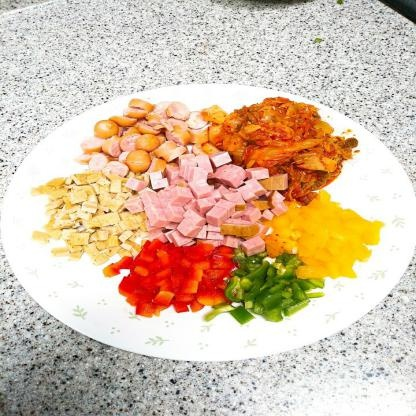

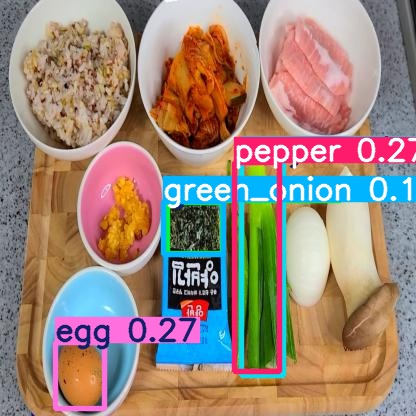

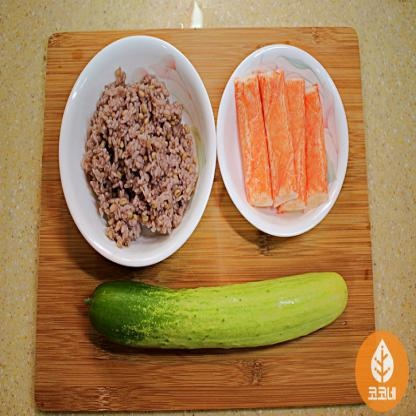

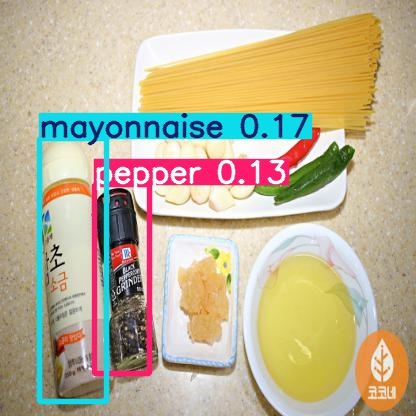

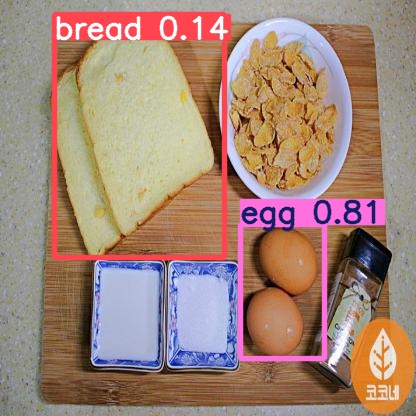

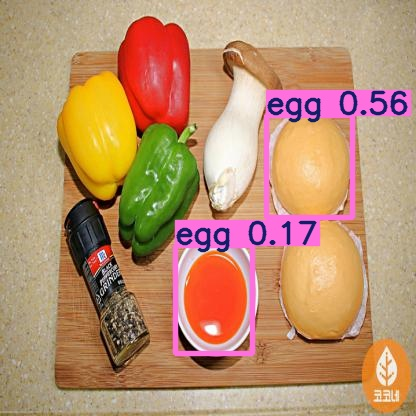

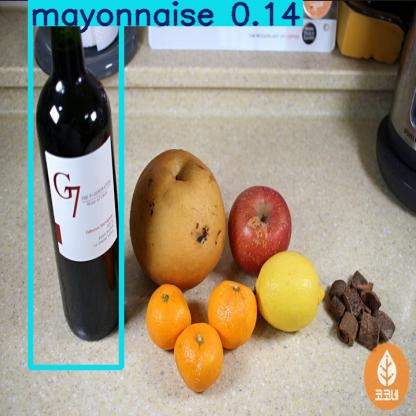

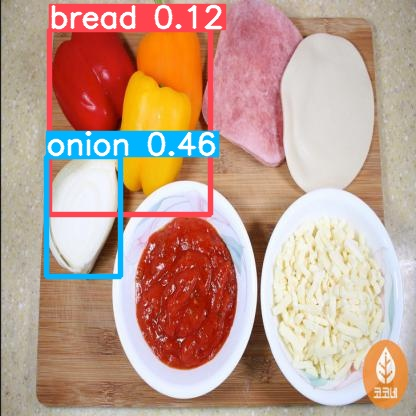

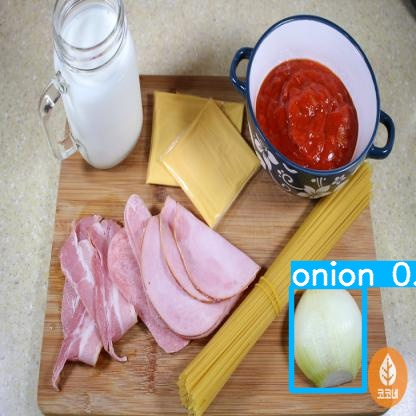

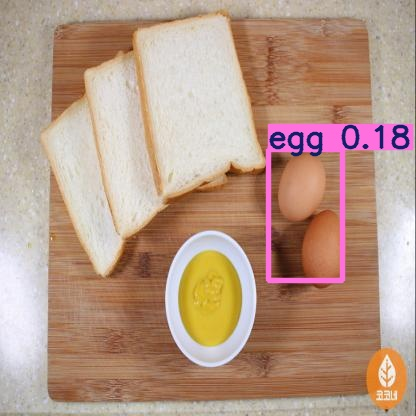

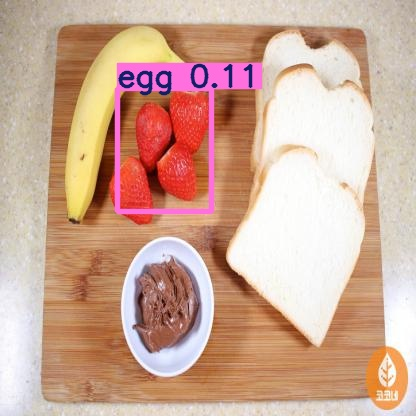

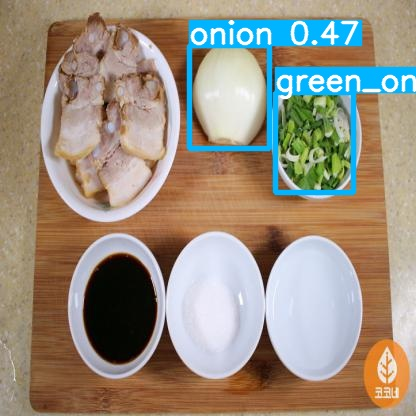

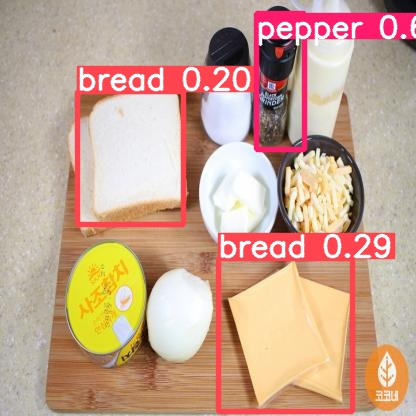

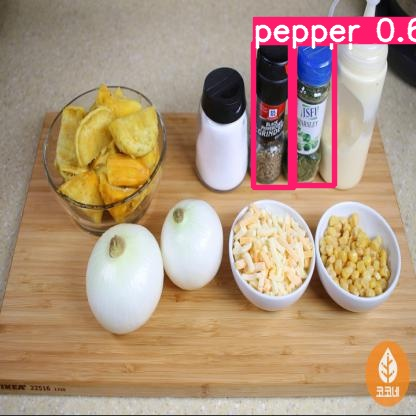

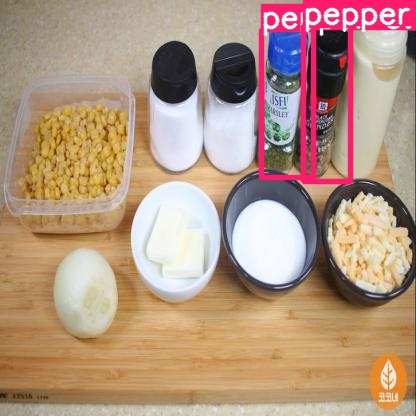

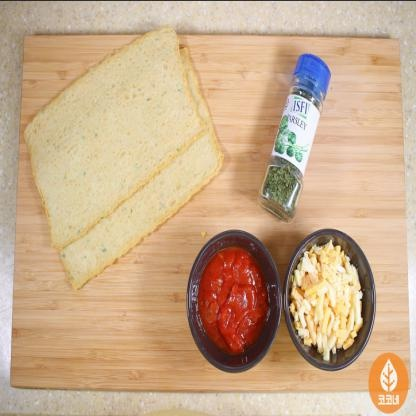

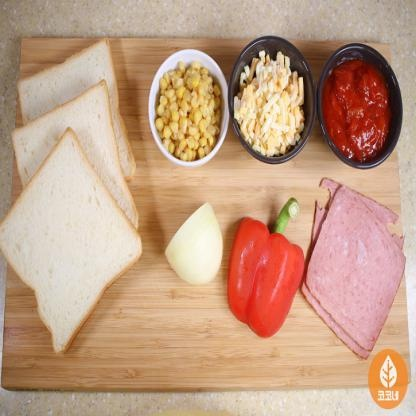

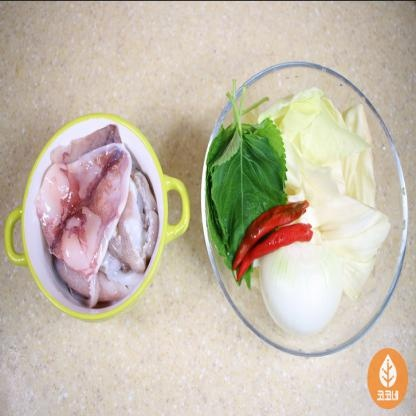

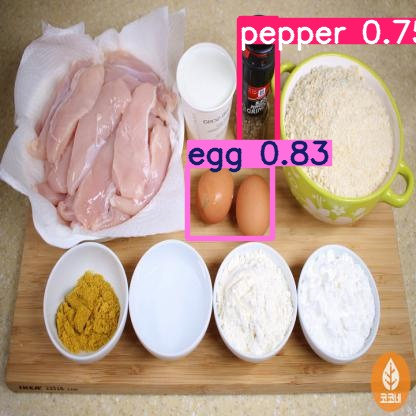

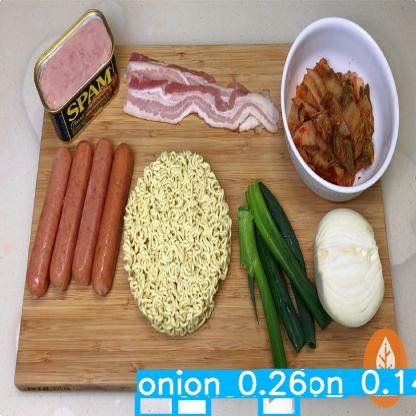

In [24]:
# 테스트 결과 확인


import glob
from IPython.display import Image, display

test_exp_num = ''

if not os.path.exists('/content/drive/MyDrive/OhMea/yolo/yolov5/runs/detect/exp4' + str(test_exp_num) + '/') :
  raise Exception('test_exp_num 을 다시 확인하세요.')

for imageName in glob.glob('/content/drive/MyDrive/OhMea/yolo/yolov5/runs/detect/exp4' + str(test_exp_num) + '/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")